# Libraries

In [2]:
import wave
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy import fft
from scipy import signal
from scipy.fft import fftshift
from scipy.io import wavfile

# Functions

In [14]:
def show_plot(file_name):
    raw = file_to_process(file_name)
    plt.title("Bonjour")
    plt.plot(raw, color="blue")
    plt.ylabel("Amplitude")
    plt.xlabel("Temps")


def show_plot_raw(raw):
    plt.title("Bonjour")
    plt.plot(raw, color="black")
    plt.ylabel("Amplitude")
    plt.xlabel("Temps")


def file_to_process(file_name):
    if not file_name.endswith('.wav'):
        print("Audio avec l'extension wav uniquement.")
        sys.exit(0)
    wav = wave.open(file_name, "r")
    raw = wav.readframes(-1)
    raw = np.frombuffer(raw, "int16")
    if wav.getnchannels() == 2:
        print("Audio stéréo non supporter.")
        sys.exit(0)
    return raw


def compare_two_signal(signal1, signal2):

    audio1_as_np_int16 = file_to_process(signal1)
    audio2_as_np_int16 = file_to_process(signal2)
    result = 0
    if len(audio2_as_np_int16) != len(audio1_as_np_int16):
        print("Vos deux son n'ont pas la même longueur.")
        sys.exit(0)
    for pos in range(len(audio2_as_np_int16)):
        if max(audio1_as_np_int16[pos] - audio2_as_np_int16[pos], audio2_as_np_int16[pos] - audio1_as_np_int16[pos]) == 0:
            result += 1
    return result / len(audio2_as_np_int16) * 100


def compute_similarity(ref_rec, input_rec):
    # Time domain similarity
    ref_time = np.correlate(ref_rec, ref_rec)
    inp_time = np.correlate(ref_rec, input_rec)
    diff_time = abs(ref_time-inp_time)

    # Freq domain similarity
    ref_freq = np.correlate(np.fft.fft(ref_rec), np.fft.fft(ref_rec))
    inp_freq = np.correlate(np.fft.fft(ref_rec), np.fft.fft(input_rec))
    diff_freq = abs(ref_freq-inp_freq)

    # Power similarity
    ref_power = np.sum(ref_rec**2)
    inp_power = np.sum(input_rec**2)
    diff_power = abs(ref_power-inp_power)

    return float(diff_time), float(diff_freq), float(diff_power)


def lissage(signal_brut,L):
    res = np.copy(signal_brut) # duplication des valeurs

    for i in range (1,len(signal_brut)-1): # toutes les valeurs sauf la première et la dernière
        L_g = min(i,L) # nombre de valeurs disponibles à gauche
        L_d = min(len(signal_brut)-i-1,L) # nombre de valeurs disponibles à droite
        Li=min(L_g,L_d)
        res[i]=np.sum(signal_brut[i-Li:i+Li+1])/(2*Li+1)

    return res

def cut_signal(signal_lisse):
    new_signal = []
    for value in range(len(signal_lisse)):
        if signal_lisse[value] >= 100:
            new_signal.append(signal_lisse[value])
    
    return new_signal
    

# cross correlation

similitude de  2.555338541666667  %
Cross correlation :  173.58756510416666


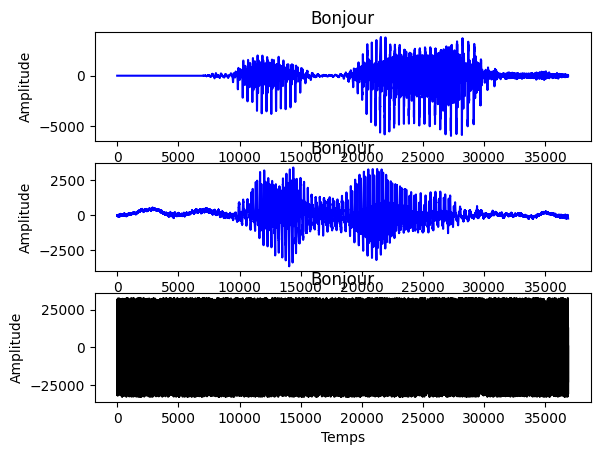

(490903333.078125-1.838179139006728e-25j)
(0.0, 0.0, 0.0)
(18683.0, 1167167446659071.0, 52862826.0)
(7243.0, 1188114925473791.0, 18687623.0)


In [4]:
print("similitude de ", compare_two_signal(
        'bonjour.wav', 'bonjour2.wav'), ' %')
plt.subplot(3, 1, 1)
show_plot('bonjour.wav')
plt.subplot(3, 1, 2)
show_plot('bonjour3.wav')
plt.subplot(3, 1, 3)
raw = np.correlate(file_to_process(
    'bonjour.wav'), file_to_process('patate.wav'), 'same')
print("Cross correlation : ", np.average(raw))
show_plot_raw(raw)
plt.show()
corr = fft.ifft(fft.fft(file_to_process('bonjour3.wav')) *
                    np.conj(fft.fft(file_to_process('bonjour4.wav'))))
print(np.average(corr))
print(compute_similarity(file_to_process(
    'bonjour.wav'), file_to_process('bonjour.wav')))
print(compute_similarity(file_to_process(
    'bonjour.wav'), file_to_process('patate.wav')))
print(compute_similarity(file_to_process(
    'bonjour.wav'), file_to_process('bonjour2.wav')))

# Spectograme

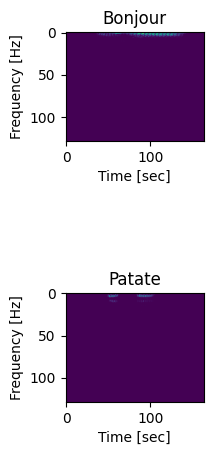

In [5]:
sample_rate, samples = wavfile.read('bonjour4.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.subplot(3, 1, 1)
plt.title("Bonjour")
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

sample_rate2, samples2 = wavfile.read('patate.wav')
frequencies2, times2, spectrogram2 = signal.spectrogram(samples2, sample_rate2)
plt.subplot(3, 1, 3)
plt.title("Patate")
plt.pcolormesh(times2, frequencies2, spectrogram2)
plt.imshow(spectrogram2)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

# Moyenne glissante

[ 0  0  0 ... 59 37 13]


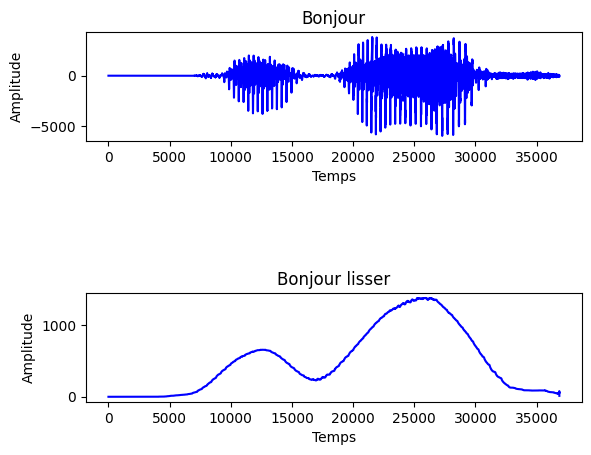

In [11]:
signal_absolue = np.absolute(file_to_process("bonjour.wav"))
signal_lisse = lissage(signal_absolue, 3000)
print(signal_lisse)
plt.subplot(3, 1, 1)
show_plot('bonjour.wav')
plt.subplot(3, 1, 3)
plt.title("Bonjour lisser")
plt.plot(signal_lisse, color="blue")
plt.ylabel("Amplitude")
plt.xlabel("Temps")

plt.show()

# Découpe du signal

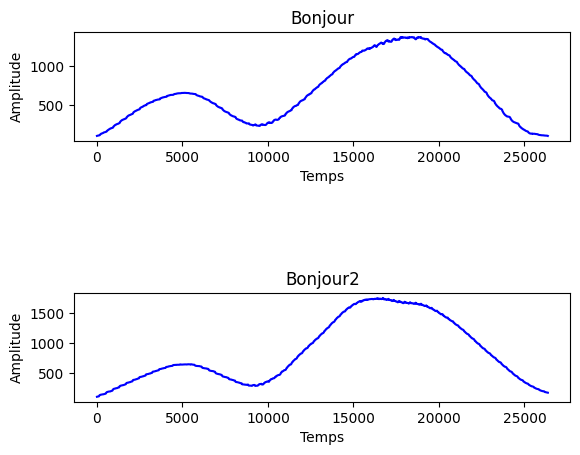

In [19]:
signal_absolue2 = np.absolute(file_to_process("bonjour2.wav"))
signal_lisse2 = lissage(signal_absolue2, 3000)

new_signal1 = cut_signal(signal_lisse)
new_signal2 = cut_signal(signal_lisse2)

if len(new_signal) < len(new_signal2):
    new_signal2 = new_signal2[:len(new_signal)-1]

elif len(new_signal) > len(new_signal2):
    new_signal = new_signal[:len(new_signal2)-1]

plt.subplot(3, 1, 1)
plt.title("Bonjour")
plt.plot(new_signal1, color="blue")
plt.ylabel("Amplitude")
plt.xlabel("Temps")

plt.subplot(3, 1, 3)
plt.title("Bonjour2")
plt.plot(new_signal2, color="blue")
plt.ylabel("Amplitude")
plt.xlabel("Temps")


plt.show()